In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn import tree

In [2]:
imu_data = pd.read_csv("IMU_Dataset.csv")

In [3]:
imu_data.head()

,IQRAccX,IQRAccY,IQRAccZ,IQRGyroX,IQRGyroY,IQRGyroZ,IQRMagX,IQRMagY,IQRMagZ,KurtosisAccX,...,VarianceMagY,VarianceMagZ,meanAccX,meanAccY,meanAccZ,meanGyroY,meanGyroZ,meanMagX,meanMagY,Label
0,0.380698,0.220278,0.251404,0.053264,0.048603,0.045008,0.901977,1.262768,0.610882,-1.597763,...,0.971070,2.400533,-6.944496,3.828045,2.745810,-1.356632,-0.469065,-5.303622,50.763238,0
1,0.380698,0.220278,0.251404,0.053264,0.048603,0.045008,0.901977,1.262768,0.610882,-1.323387,...,0.559324,1.269955,-5.192091,2.114187,4.400767,0.835795,0.573020,-12.582573,51.457760,0
2,0.380698,0.220278,0.251404,0.053264,0.048603,0.045008,0.901977,1.262768,0.610882,-1.132845,...,1.519325,0.919619,-8.785971,4.398373,2.660094,-1.553696,-0.407838,-1.488261,48.391040,0
3,0.380698,0.220278,0.251404,0.053264,0.048603,0.045008,0.901977,1.262768,0.610882,-1.320270,...,0.949832,0.462667,-4.820971,3.034806,4.142180,0.906037,0.615698,-14.747316,48.932226,0
4,0.380698,0.220278,0.251404,0.053264,0.048603,0.045008,0.901977,1.262768,0.610882,-1.428473,...,4.466451,0.674429,-6.757580,3.384776,3.214779,-1.323307,-0.317688,-5.622320,49.338115,0


In [39]:
imu_shuffle_data = shuffle(imu_data)

#### Sample Dataset

In [40]:
imu_shuffle_data.head()

,IQRAccX,IQRAccY,IQRAccZ,IQRGyroX,IQRGyroY,IQRGyroZ,IQRMagX,IQRMagY,IQRMagZ,KurtosisAccX,...,VarianceMagY,VarianceMagZ,meanAccX,meanAccY,meanAccZ,meanGyroY,meanGyroZ,meanMagX,meanMagY,Label
395,0.483653,0.356755,0.332811,0.119711,0.102666,0.109724,1.803953,1.082367,1.483574,-0.876122,...,3.543498,6.528429,0.197584,1.382462,7.860461,0.135918,0.259306,-19.647401,99.805662,5
245,0.134083,0.110139,1.920248,0.120643,0.066047,0.074836,0.721582,0.721584,2.443537,6.895658,...,0.852303,6.383267,-8.333159,4.998664,0.876322,-0.054526,0.019120,3.101081,34.455502,1
384,0.900266,3.270646,5.559620,0.033557,0.230899,0.087086,6.313835,7.396202,17.977446,-1.083227,...,31.453693,184.426760,5.376587,-5.218029,2.096896,0.517929,-0.221298,-23.792136,95.629555,0
104,0.684776,0.253798,0.191546,0.046339,0.062585,0.022105,2.345139,0.901978,1.221764,0.105399,...,2.065303,1.553526,-7.411629,6.184538,-0.769775,0.008838,0.139983,2.581908,48.221919,2
411,0.399852,0.184363,0.302882,0.069110,0.053397,0.044742,1.533360,1.803955,0.829057,1.325616,...,0.898896,0.393861,6.427801,-7.211543,-3.788299,0.062465,-0.116223,-14.046782,82.861576,6


In [41]:
print ("Dataset Lenght:: "+ str(len(imu_shuffle_data)))
print ("Dataset Shape:: "+str(imu_shuffle_data.shape))

Dataset Lenght:: 415
Dataset Shape:: (415, 98)


### seperating label column and feature colum

In [42]:
X = imu_shuffle_data.values[:,0:97]
Y = imu_shuffle_data.values[:,-1]

### Splitting test data and training data

In [43]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

### Decision tree classifier with gini index as criterion

In [44]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

### Decision tree classifier with information gain as criterion

In [45]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

### Sample prediction result

### prediction using gini index as criterion

In [46]:
y_pred = clf_gini.predict(X_test)
y_pred

array([0., 5., 4., 4., 4., 1., 0., 1., 5., 0., 0., 0., 0., 1., 6., 1., 0.,
       5., 4., 0., 4., 0., 0., 0., 1., 0., 4., 0., 1., 0., 4., 5., 4., 4.,
       1., 1., 0., 0., 1., 0., 5., 0., 4., 0., 0., 1., 6., 0., 6., 6., 0.,
       5., 6., 4., 4., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 4., 0., 0.,
       1., 0., 1., 0., 0., 1., 6., 4., 0., 0., 4., 0., 6., 6., 0., 0., 0.,
       4., 0., 6., 4., 0., 4., 0., 5., 0., 4., 4., 4., 1., 0., 5., 1., 4.,
       0., 0., 0., 6., 0., 6., 4., 1., 0., 4., 4., 0., 1., 0., 0., 0., 4.,
       0., 0., 1., 0., 6., 1.])

### Prediction usin Information gain as criterion

In [47]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array([0., 5., 4., 1., 4., 1., 0., 1., 5., 0., 0., 0., 0., 1., 6., 1., 0.,
       5., 1., 0., 4., 0., 0., 0., 1., 0., 4., 0., 1., 0., 4., 5., 4., 1.,
       1., 1., 0., 0., 1., 0., 5., 0., 1., 0., 0., 1., 5., 0., 6., 6., 0.,
       5., 5., 1., 4., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 6., 4., 0., 0., 4., 0., 5., 6., 0., 0., 0.,
       4., 0., 6., 1., 0., 4., 0., 5., 0., 4., 4., 1., 1., 0., 5., 1., 1.,
       0., 0., 0., 6., 0., 5., 4., 1., 0., 1., 4., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 6., 1.])

### Result

In [48]:
print ("Accuracy is "+str( accuracy_score(y_test,y_pred)*100))

Accuracy is 77.60000000000001


In [49]:
print ("Accuracy is "+ str(accuracy_score(y_test,y_pred_en)*100))

Accuracy is 79.2


### Confusion matrix using gini index as criterion

In [50]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
labels = [1,2,3,4,5,6,7,8,9,10]
cm_gini = confusion_matrix(y_test, y_pred,labels)
print(cm_gini)

[[12  0  0  6  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5  0  1  0  0  0  0]
 [ 1  0  0 13  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]]


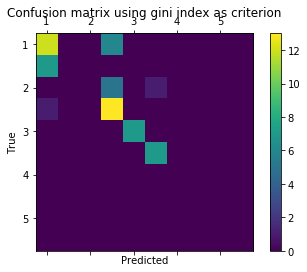

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm_gini)
plt.title('Confusion matrix using gini index as criterion')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Confusion matrix using information gain as criterion

In [52]:
cm = confusion_matrix(y_test, y_pred_en,labels)
print(cm)

[[18  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5  0  1  0  0  0  0]
 [ 5  0  0  9  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]]


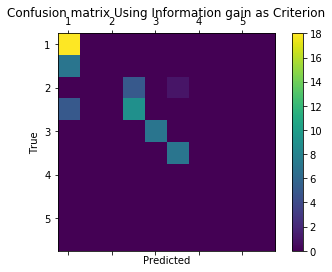

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix Using Information gain as Criterion')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()